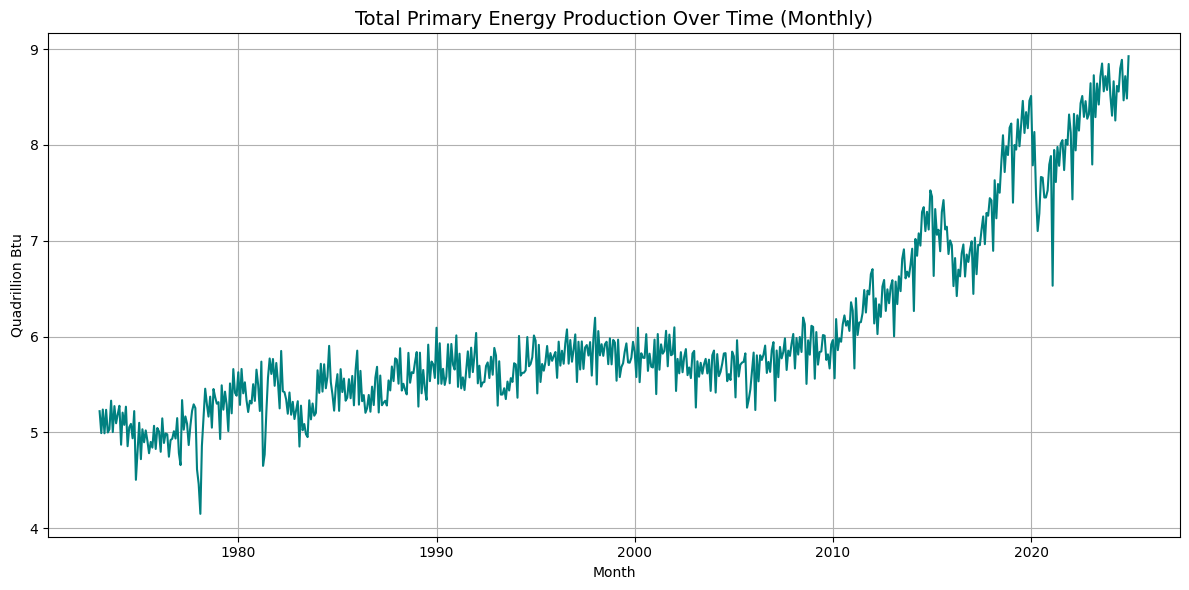

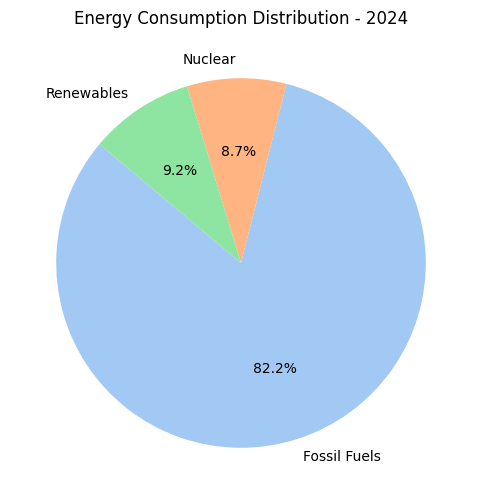

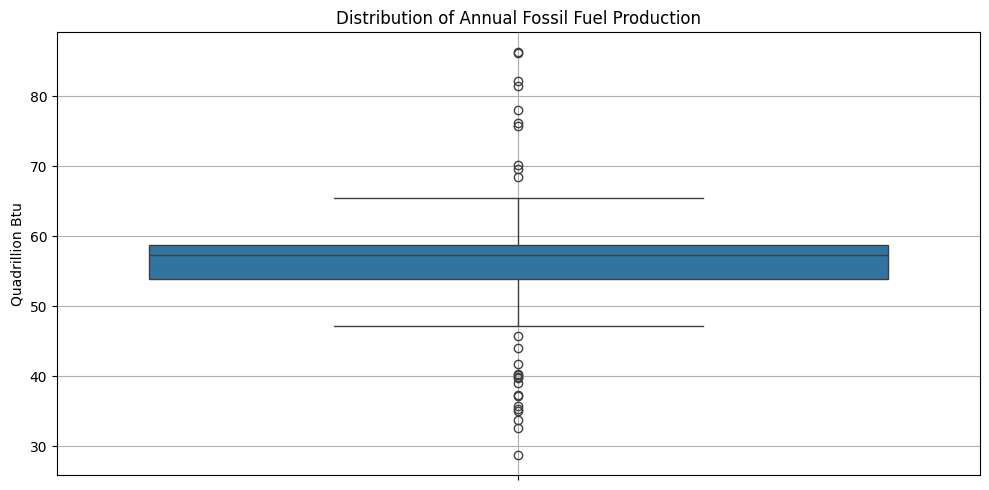

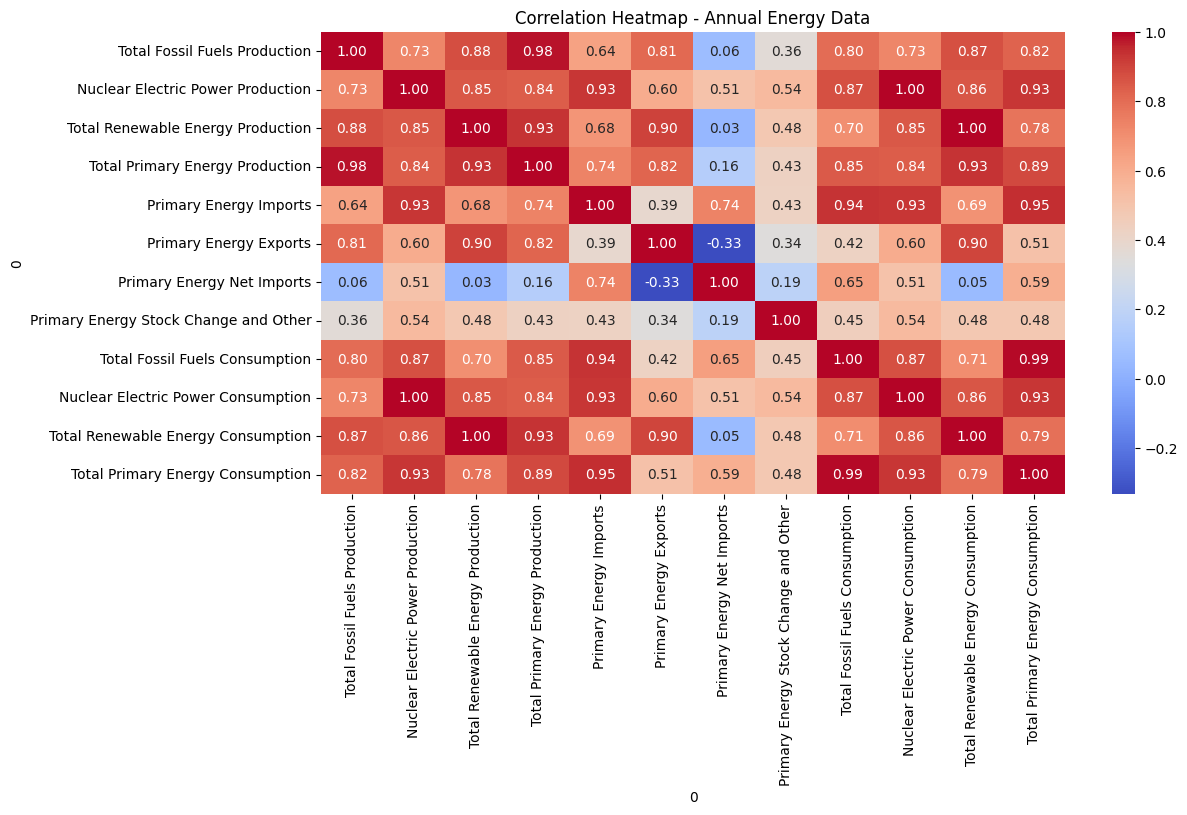

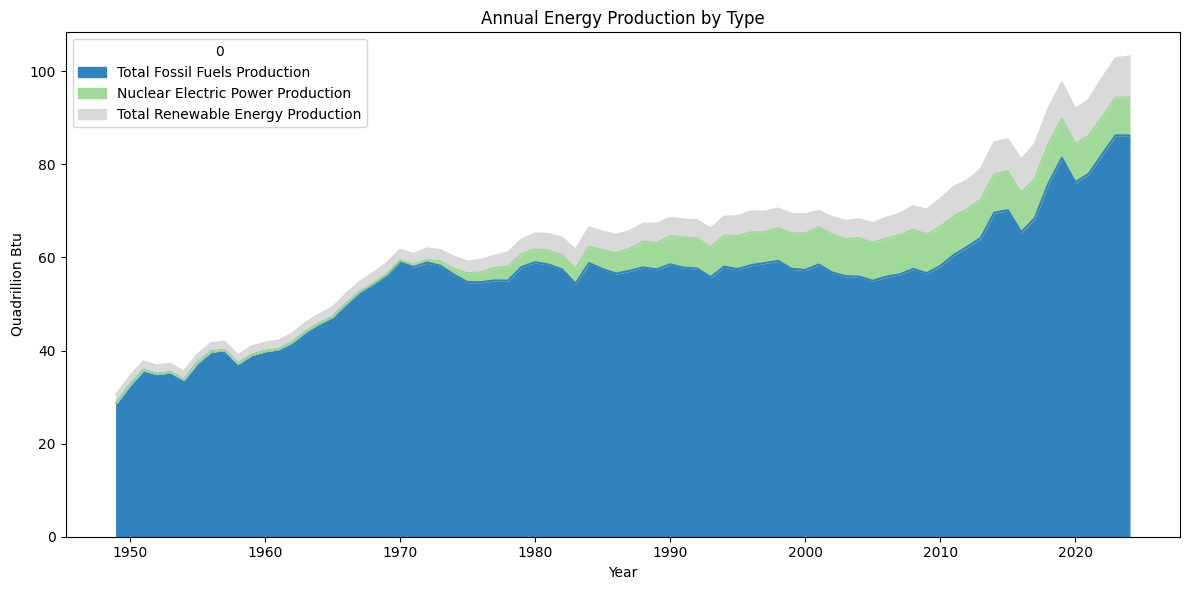

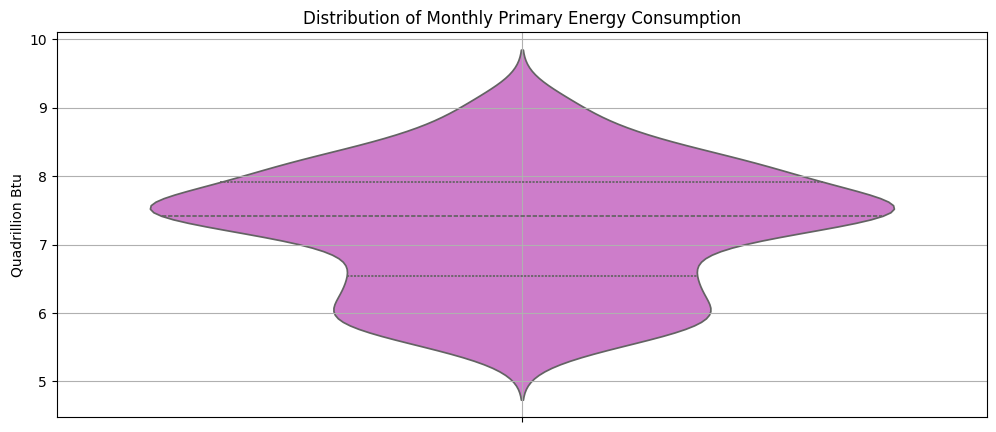

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load Excel file
file_path = '/pthon project.xlsx'
excel = pd.ExcelFile(file_path)

# Load Monthly and Annual Data
monthly_raw = excel.parse('Monthly Data')
annual_raw = excel.parse('Annual Data')

# Detect header row (row with >2 non-null values)
def detect_header(df):
    for i, row in df.iterrows():
        if row.notna().sum() > 2:
            return i
    return 0

monthly_header = detect_header(monthly_raw)
annual_header = detect_header(annual_raw)

# Load cleaned data
monthly = pd.read_excel(file_path, sheet_name='Monthly Data', skiprows=monthly_header)
annual = pd.read_excel(file_path, sheet_name='Annual Data', skiprows=annual_header)

# Drop fully empty columns
monthly.dropna(axis=1, how='all', inplace=True)
annual.dropna(axis=1, how='all', inplace=True)

# Assign new headers and drop second row (units)
monthly.columns = monthly.iloc[0]
monthly = monthly.drop(index=0).reset_index(drop=True)
monthly.rename(columns={monthly.columns[0]: 'Month'}, inplace=True)

annual.columns = annual.iloc[0]
annual = annual.drop(index=0).reset_index(drop=True)
annual.rename(columns={annual.columns[0]: 'Year'}, inplace=True)

# Convert to proper types
monthly['Month'] = pd.to_datetime(monthly['Month'], errors='coerce')
annual['Year'] = pd.to_numeric(annual['Year'], errors='coerce')

# Convert other columns to numeric
monthly.iloc[:, 1:] = monthly.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
annual.iloc[:, 1:] = annual.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Drop rows with null date/year
monthly.dropna(subset=['Month'], inplace=True)
annual.dropna(subset=['Year'], inplace=True)

# ------------- 📊 VISUALIZATION ---------------- #

# Line Chart: Total Primary Energy Production (Monthly)
plt.figure(figsize=(12, 6))
plt.plot(monthly['Month'], monthly['Total Primary Energy Production'], color='teal')
plt.title('Total Primary Energy Production Over Time (Monthly)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Quadrillion Btu')
plt.grid(True)
plt.tight_layout()
plt.show()

# Pie Chart: Annual breakdown for a selected year
latest_year = int(annual['Year'].max())
pie_data = annual[annual['Year'] == latest_year].iloc[0]
labels = ['Fossil Fuels', 'Nuclear', 'Renewables']
values = [
    pie_data['Total Fossil Fuels Consumption'],
    pie_data['Nuclear Electric Power Consumption'],
    pie_data['Total Renewable Energy Consumption']
]

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title(f'Energy Consumption Distribution - {latest_year}')
plt.show()

# Box Plot: Fossil Fuel Production per Year
plt.figure(figsize=(10, 5))
sns.boxplot(data=annual, y='Total Fossil Fuels Production')
plt.title('Distribution of Annual Fossil Fuel Production')
plt.ylabel('Quadrillion Btu')
plt.grid(True)
plt.tight_layout()
plt.show()

# Heatmap: Correlation of annual data
plt.figure(figsize=(12, 6))
sns.heatmap(annual.iloc[:, 1:].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap - Annual Energy Data')
plt.show()

# Area Chart: Annual Energy Production Types
annual_plot = annual[['Year', 'Total Fossil Fuels Production', 'Nuclear Electric Power Production', 'Total Renewable Energy Production']]
annual_plot = annual_plot.set_index('Year')
annual_plot.plot(kind='area', stacked=True, figsize=(12, 6), colormap='tab20c')
plt.title('Annual Energy Production by Type')
plt.ylabel('Quadrillion Btu')
plt.tight_layout()
plt.show()

# Violin Plot: Monthly Primary Energy Consumption
plt.figure(figsize=(12, 5))
sns.violinplot(data=monthly, y='Total Primary Energy Consumption', inner='quartile', color='orchid')
plt.title('Distribution of Monthly Primary Energy Consumption')
plt.ylabel('Quadrillion Btu')
plt.grid(True)
plt.show()
